Found 20 .npy files. Plotting the first 3...


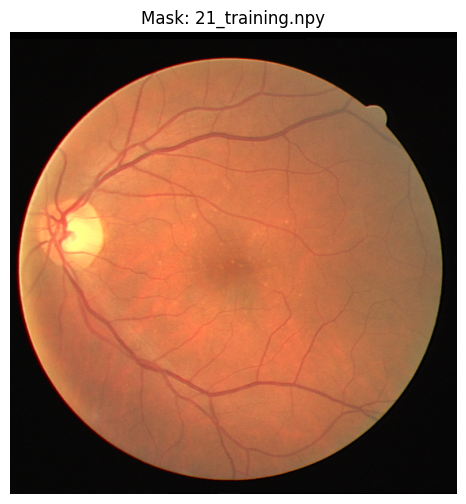

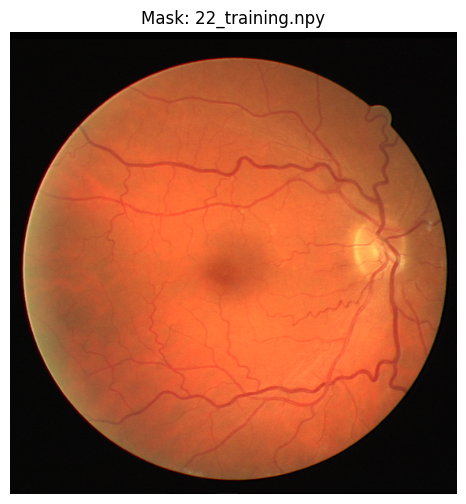

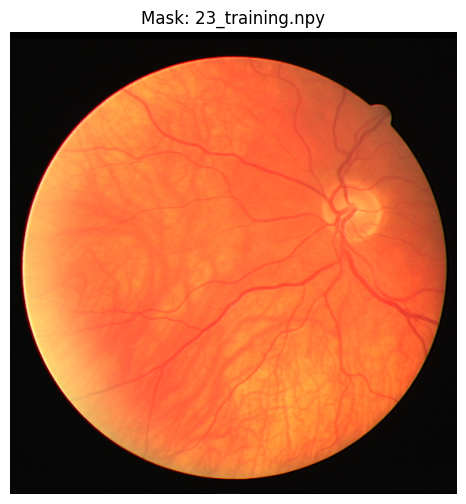

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

def plot_npy_images(npy_dir, num_images_to_plot=5):
    """
    Loads and plots .npy image files from a specified directory.

    Args:
        npy_dir (str): The path to the directory containing the .npy files.
        num_images_to_plot (int): Maximum number of images to plot.
    """
    if not os.path.isdir(npy_dir):
        print(f"Error: Directory not found - {npy_dir}")
        return

    npy_files = sorted(glob.glob(os.path.join(npy_dir, "*.npy")))

    if not npy_files:
        print(f"No .npy files found in {npy_dir}")
        return

    print(f"Found {len(npy_files)} .npy files. Plotting the first {min(num_images_to_plot, len(npy_files))}...")

    for i, npy_path in enumerate(npy_files):
        if i >= num_images_to_plot:
            break

        try:
            # Load the .npy file
            img_array = np.load(npy_path)
            # Plot the image
            plt.figure(figsize=(6, 6))
            plt.imshow(img_array, cmap='gray') # Assuming grayscale mask images
            plt.title(f"Mask: {os.path.basename(npy_path)}")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error plotting {os.path.basename(npy_path)}: {e}")

# Specify the directory containing the .npy mask files
mask_npy_dir = "./drive/training/images/"

# Run the plotting function
plot_npy_images(mask_npy_dir, num_images_to_plot=3) # Plot the first 3 images

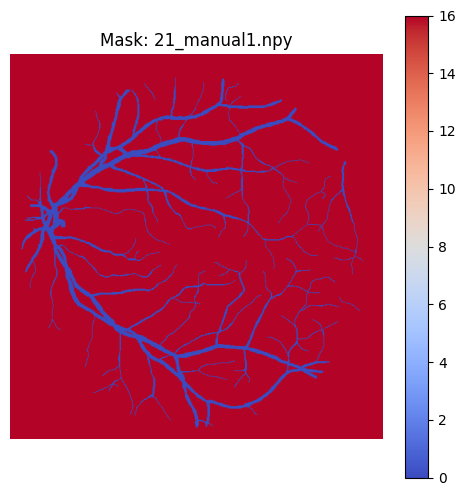

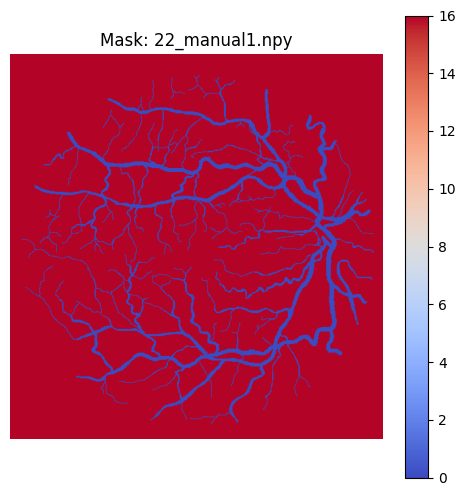

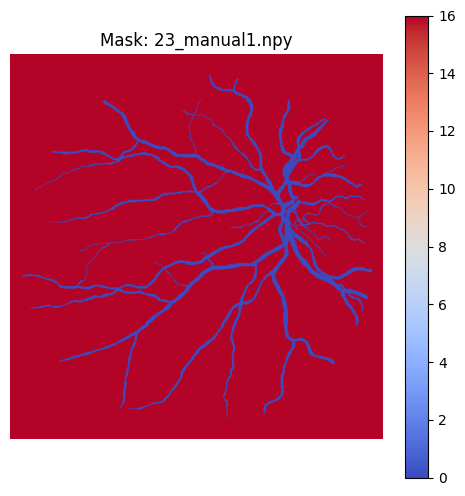

In [15]:
mask_npy_dir = "./drive/training/mask/"
mask_files = sorted(glob.glob(os.path.join(mask_npy_dir, "*.npy")))

label_npy_dir = "./drive/training/inverted_labels/"
label_files = sorted(glob.glob(os.path.join(label_npy_dir, "*.npy")))

for i, (mask_path, label_path) in enumerate(zip(mask_files, label_files)):
        if i >= 3:
            break
        try:
            # Load the .npy file
            mask = np.load(mask_path)
            mask = (mask==0)
            label = np.load(label_path)
            #label = label * mask
            # Plot the image
            plt.figure(figsize=(6, 6))
            plt.imshow((label), cmap='coolwarm') # Assuming grayscale mask images
            plt.colorbar()
            plt.title(f"Mask: {os.path.basename(label_path)}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error plotting {os.path.basename(label_path)}: {e}")

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
def show(img,title,graph=None):
    plt.figure(figsize=(10,10))
    plt.suptitle(title)
    
    plt.imshow(img,cmap="coolwarm")
    plt.colorbar()
    if graph:
        pos = {n:graph.nodes[n]['pos'][-1::-1] for n in graph.nodes()}
        nx.draw_networkx(graph, pos=pos, node_size=16, node_color='gray',
                         edge_color='g', font_size=12, font_color='black')
    plt.show()

In [37]:
import numpy as np
from Codes.utils import load_graph_txt
graph= load_graph_txt("./drive/training/graphs/21_manual1.npy.graph")
image=np.load("./drive/training/images/21_training.npy")
label=np.load("./drive/training/inverted_labels/21_manual1.npy")
mask=np.load("./drive/training/mask/21_training_mask.npy")
for n in graph.nodes:
    graph.nodes[n]["pos"] = graph.nodes[n]["pos"][-1::-1]

In [38]:
from Codes.Losses.cropGraph import cropGraph_dontCutEdges, cropGraph
from Codes.augmentations import crop

In [39]:
slices = None
image = image.astype(np.float32)
label = label.astype(np.float32)
mask = mask.astype(np.float32)
cropSize = [128,128]

image, label, mask, slices = crop([image, label, mask], cropSize)
""" cropped_graph_view = cropGraph(graph, slices)
cropped_graph = cropped_graph_view.copy() """

""" offset = np.array([s.start for s in slices])
for n in cropped_graph.nodes:
    if 'pos' in cropped_graph.nodes[n]:
        cropped_graph.nodes[n]['pos'] = cropped_graph.nodes[n]['pos'] - offset """

#graph = cropped_graph

" offset = np.array([s.start for s in slices])\nfor n in cropped_graph.nodes:\n    if 'pos' in cropped_graph.nodes[n]:\n        cropped_graph.nodes[n]['pos'] = cropped_graph.nodes[n]['pos'] - offset "

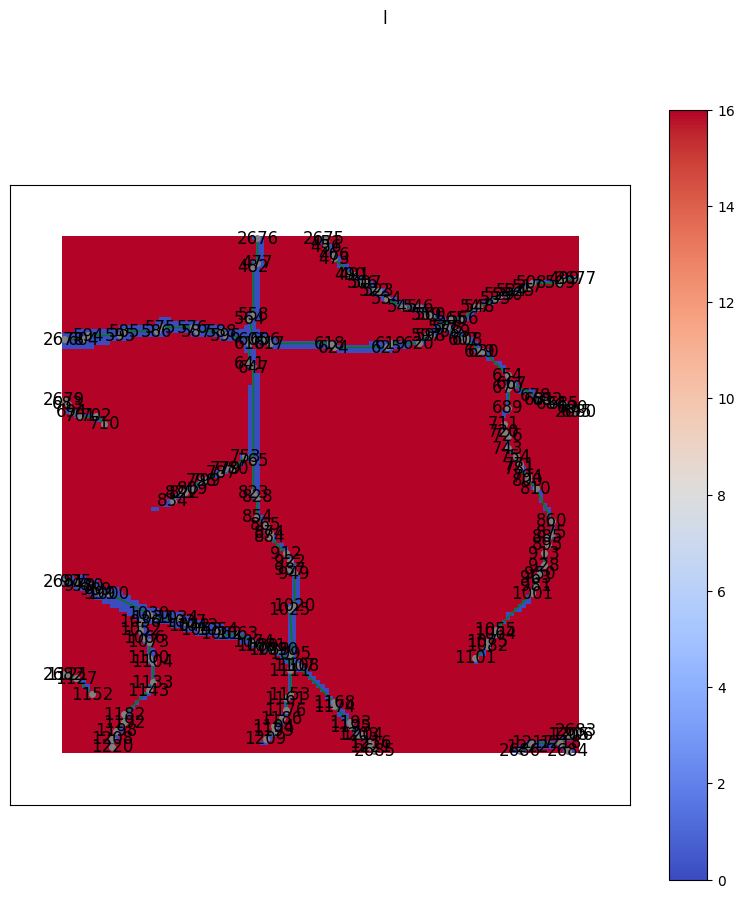

In [20]:
show(label, "l", cropped_graph)

In [25]:
cropped_graph

In [40]:
from Codes.Losses.rib import RibbonSnake

s = RibbonSnake(graph, slices, 0.1, 0.001, 0.1, 2)

In [41]:
s.s

tensor([[  0.0000,   3.0000],
        [  0.0000,  13.0000],
        [  0.0000,  55.0000],
        [  0.0000,  58.0000],
        [  0.0000, 107.0000],
        [  0.0000, 108.0000],
        [  1.0000,   2.0000],
        [  1.0000,  54.0000],
        [  1.0000,  59.0000],
        [  1.0000,  74.0000],
        [  1.0000,  89.0000],
        [  1.0000,  96.0000],
        [  2.0000,  75.0000],
        [  2.0000,  88.0000],
        [  3.0000, 111.0000],
        [  3.0000, 112.0000],
        [  6.0000,  54.0000],
        [  7.0000,  55.0000],
        [  8.0000,   2.0000],
        [  9.0000, 118.0000],
        [ 10.0000,   4.0000],
        [ 11.0000,   4.0000],
        [ 11.0000, 119.0000],
        [ 12.0000, 118.0000],
        [ 14.0000, 125.0000],
        [ 15.0000, 126.0000],
        [ 16.0000,   9.0000],
        [ 17.0000, 118.0000],
        [ 18.0000,  10.0000],
        [ 19.0000,  12.0000],
        [ 19.0000,  16.0000],
        [ 21.0000,  18.0000],
        [ 21.0000, 117.0000],
        [ 

In [42]:
label.shape

(128, 128)

In [43]:
a = s.render_distance_map_with_widths((128,128), 10.0)

/var/folders/vw/ngjpb6v53n1bnfth8cfm07ym0000gn/T/ipykernel_2159/927760645.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  show(np.array(a), " ", s.getGraph())


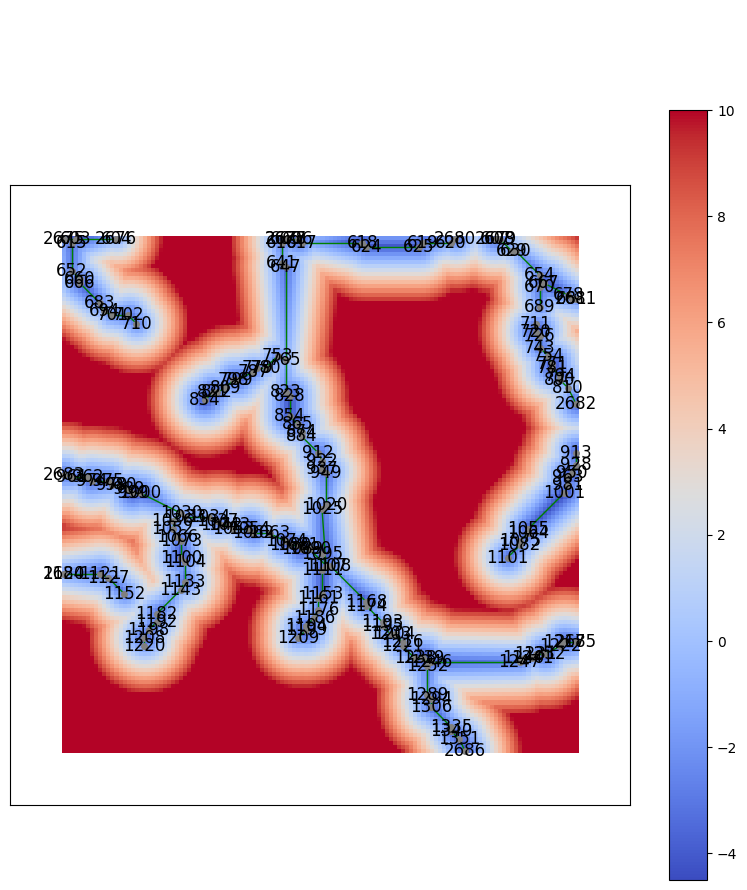

In [44]:
show(np.array(a), " ", s.getGraph())